In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [390]:
plt.rcParams['figure.figsize'] = (12,6)

In [391]:
train_df = pd.read_excel('FlightDataset/Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [392]:
test_df = pd.read_excel('FlightDataset/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [393]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [394]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [395]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [396]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [397]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

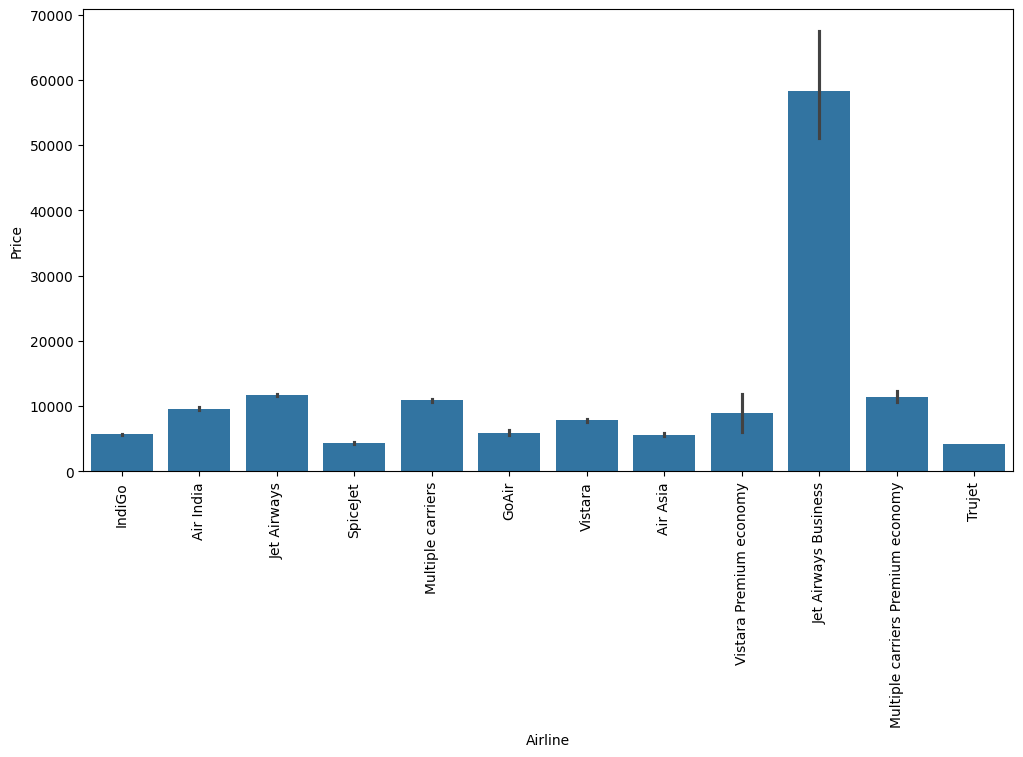

In [398]:
sns.barplot(x='Airline', y='Price', data=train_df)
plt.xticks(rotation=90)

#### Jet Airways Business has more expensive flight prices compared to other airlines, being an outlier

In [399]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

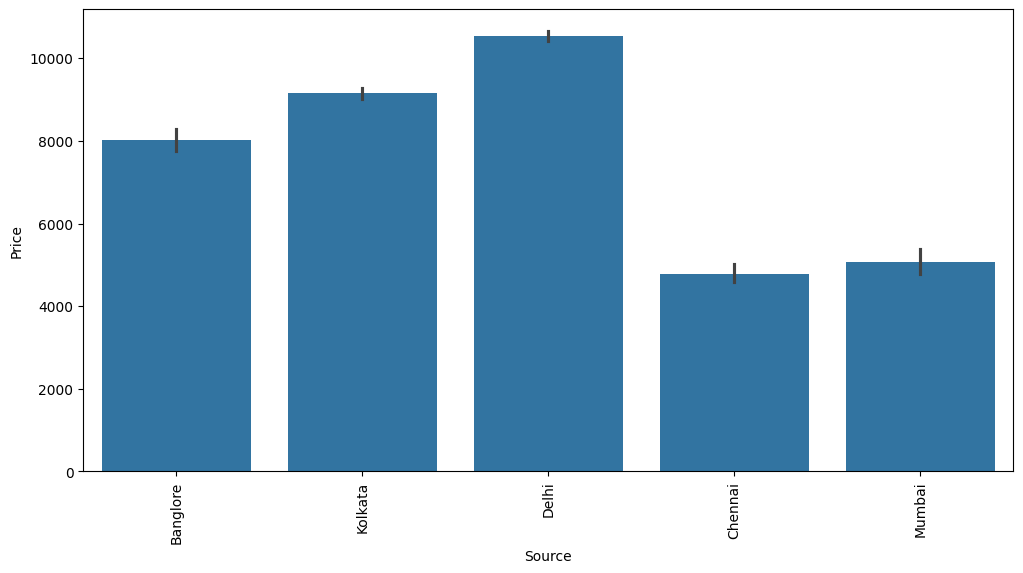

In [400]:
sns.barplot(x='Source', y='Price', data=train_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

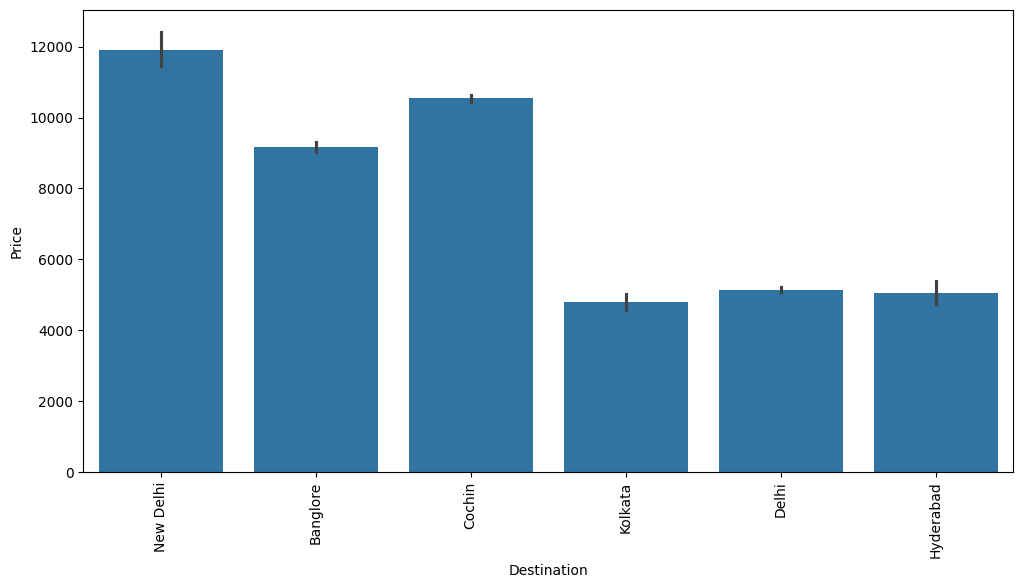

In [401]:
sns.barplot(x='Destination', y='Price', data=train_df)
plt.xticks(rotation=90)

In [402]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

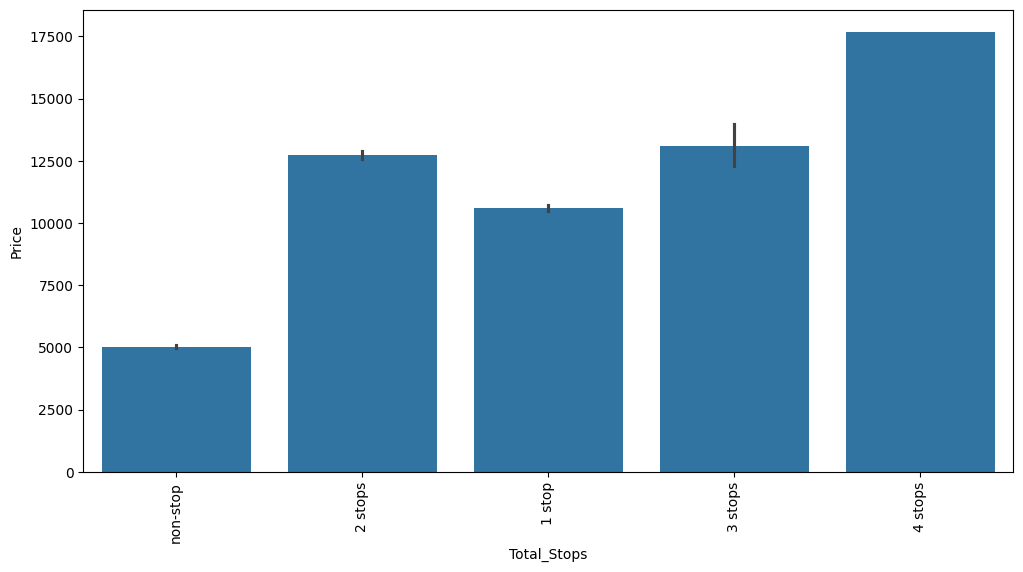

In [403]:
sns.barplot(x='Total_Stops', y='Price', data=train_df)
plt.xticks(rotation=90)

#### More stops = Higher fligh prices

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

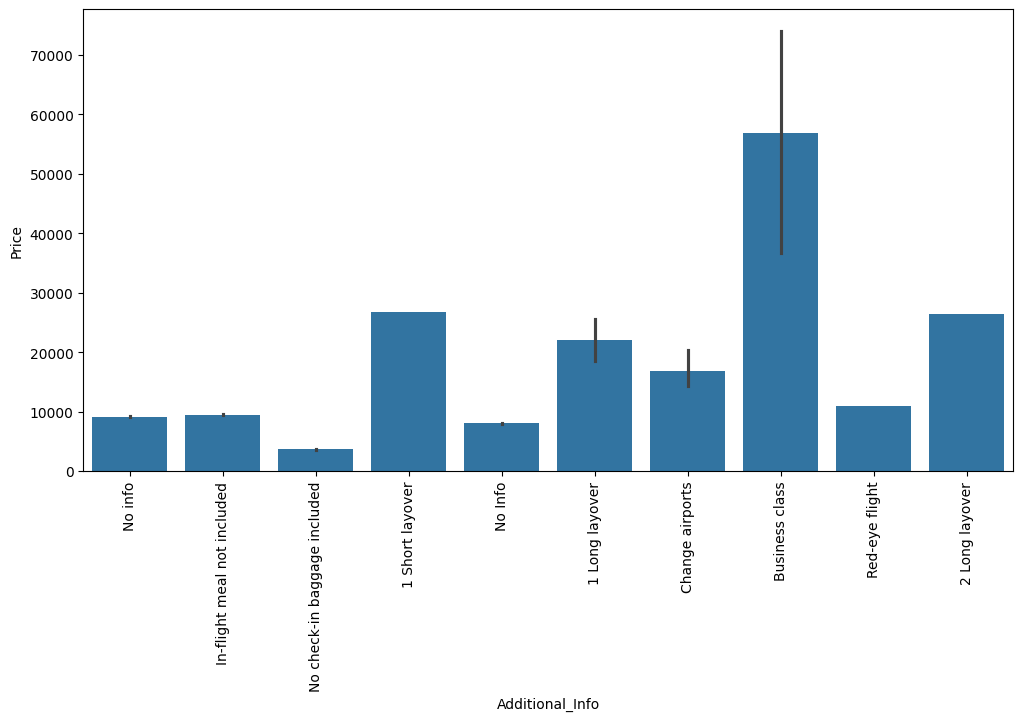

In [404]:
sns.barplot(x='Additional_Info', y='Price', data=train_df)
plt.xticks(rotation=90)

#### In addtional Info, business classes have higher prices, followed by info. about layovers

### Modifying features in dataset

In [405]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Date of Jorney -> Day, Month, Year

In [406]:
train_df['Journey_Date'] = train_df['Date_of_Journey'].apply(lambda x: x.split('/')[0])
train_df['Journey_Month'] = train_df['Date_of_Journey'].apply(lambda x: x.split('/')[1])
train_df['Journey_Year'] = train_df['Date_of_Journey'].apply(lambda x: x.split('/')[2])

train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019


#### Deleting Date_of_Journey feature

In [407]:
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)
train_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019


#### Converting object into int64 type

In [408]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Journey_Date     10683 non-null  object
 11  Journey_Month    10683 non-null  object
 12  Journey_Year     10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [409]:
train_df['Journey_Date'] = train_df['Journey_Date'].astype(int)
train_df['Journey_Month'] = train_df['Journey_Month'].astype(int)
train_df['Journey_Year'] = train_df['Journey_Year'].astype(int)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Journey_Date     10683 non-null  int64 
 11  Journey_Month    10683 non-null  int64 
 12  Journey_Year     10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


### Now we plot the Journey Dates to see their effect on Price

<Axes: xlabel='Journey_Date', ylabel='Price'>

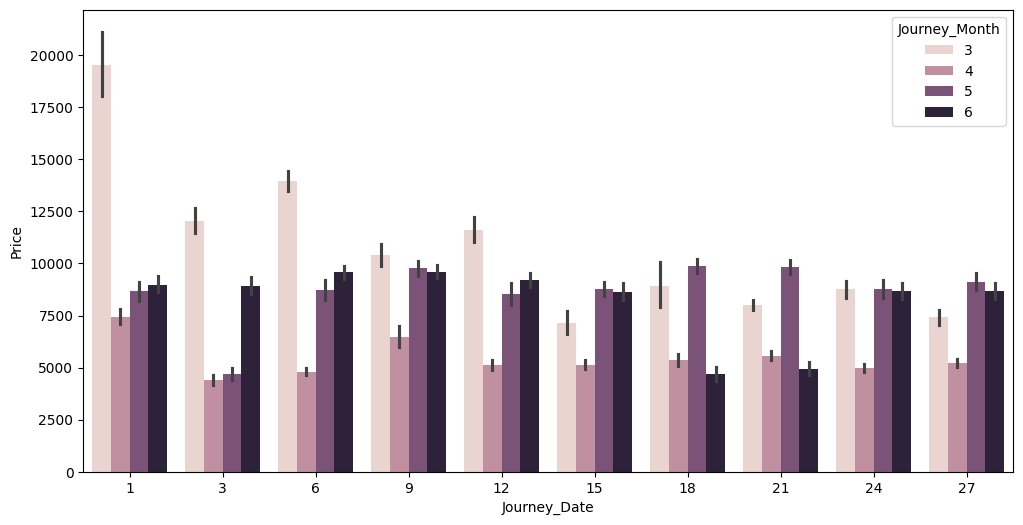

In [410]:
sns.barplot(x='Journey_Date', y='Price', hue='Journey_Month', data=train_df)

### Observation
- 1st of March had the highest flight price, compared to others (can be considered as an outlier).
- Flight prices gradually decreased near the end of month.
- Conclusion
  - Travel at the end of month as flights are relatively cheaper, regardless of the month.

<Axes: xlabel='Journey_Year', ylabel='Price'>

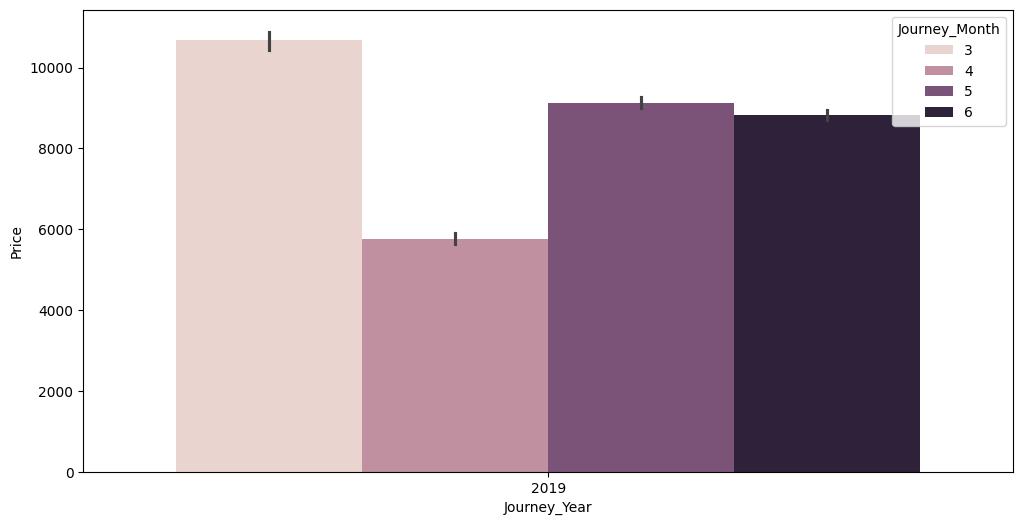

In [411]:
sns.barplot(x='Journey_Year', y='Price', hue='Journey_Month', data=train_df)

### Observation
Flights prices during April were cheaper compared to other months.
Conlusion
- People might travel less during the month of April, leading to cheaper flight prices

In [412]:
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


#### Modifying features --> Dept_Time, Arrival_Time, Route & Duration

In [413]:
train_df['Dep_Hour'] = train_df['Dep_Time'].apply(lambda x: x.split(':')[0])
train_df['Dep_Minutes'] = train_df['Dep_Time'].apply(lambda x: x.split(':')[1])

## dropping column
train_df.drop('Dep_Time', axis=1, inplace=True)

## converting hour and minute into integer type
train_df['Dep_Hour'] = train_df['Dep_Hour'].astype(int)
train_df['Dep_Minutes'] = train_df['Dep_Minutes'].astype(int)

train_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25


In [414]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Journey_Date     10683 non-null  int64 
 10  Journey_Month    10683 non-null  int64 
 11  Journey_Year     10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Minutes      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [415]:
train_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25


In [416]:
## seperating time and date/month values in arrival time
train_df['Arrival_Time'] = train_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

train_df['Arrival_Hour'] = train_df['Arrival_Time'].apply(lambda x: x.split(':')[0])
train_df['Arrival_Minutes'] = train_df['Arrival_Time'].apply(lambda x: x.split(':')[1])

## dropping column
train_df.drop('Arrival_Time', axis=1, inplace=True)

## converting hour and minute into integer type
train_df['Arrival_Hour'] = train_df['Arrival_Hour'].astype(int)
train_df['Arrival_Minutes'] = train_df['Arrival_Minutes'].astype(int)

train_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [417]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Journey_Date     10683 non-null  int64 
 9   Journey_Month    10683 non-null  int64 
 10  Journey_Year     10683 non-null  int64 
 11  Dep_Hour         10683 non-null  int64 
 12  Dep_Minutes      10683 non-null  int64 
 13  Arrival_Hour     10683 non-null  int64 
 14  Arrival_Minutes  10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


### One hot encoding each route

In [418]:
train_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [419]:
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Date       0
Journey_Month      0
Journey_Year       0
Dep_Hour           0
Dep_Minutes        0
Arrival_Hour       0
Arrival_Minutes    0
dtype: int64

In [420]:
train_df[train_df['Route'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,45,9,25


In [421]:
train_df.dropna(how='any', axis=0, inplace=True)
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Date       0
Journey_Month      0
Journey_Year       0
Dep_Hour           0
Dep_Minutes        0
Arrival_Hour       0
Arrival_Minutes    0
dtype: int64

In [422]:
train_df['Route'].str.count('→').max()

np.int64(5)

In [423]:
train_df[['Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Route6']] = train_df['Route'].str.split('→', expand=True)

In [424]:
train_df.drop('Route', axis=1, inplace=True)
train_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None,None


### Converting Duration Feature's hour into minutes
i.e. if duation = 1h 50m = 1x60m + 50m

In [425]:
duration_hr = train_df['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)  ## get 1 or more digit in Duration(column) that has h after it
duration_min = train_df['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)  ## get 1 or more digit in Duration(column) that has m after it

In [426]:
train_df['Duration_in_Minutes'] = duration_hr* 60 + duration_min
train_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,...,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,Route3,Route4,Route5,Route6,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,...,20,1,10,BLR,DEL,None,None,None,None,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,...,50,13,15,CCU,IXR,BBI,BLR,None,None,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,...,25,4,25,DEL,LKO,BOM,COK,None,None,1140


In [427]:
train_df.drop(['Duration'], axis=1, inplace=True)
train_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,Route3,Route4,Route5,Route6,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,BLR,DEL,None,None,None,None,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None,None,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None,None,1140


### Finally Plotting out new Adjustments

#### 1. Duration of flight w.r.t price

In [428]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_Date', 'Journey_Month', 'Journey_Year', 'Dep_Hour',
       'Dep_Minutes', 'Arrival_Hour', 'Arrival_Minutes', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5', 'Route6', 'Duration_in_Minutes'],
      dtype='object')

<Axes: xlabel='Duration_in_Minutes', ylabel='Price'>

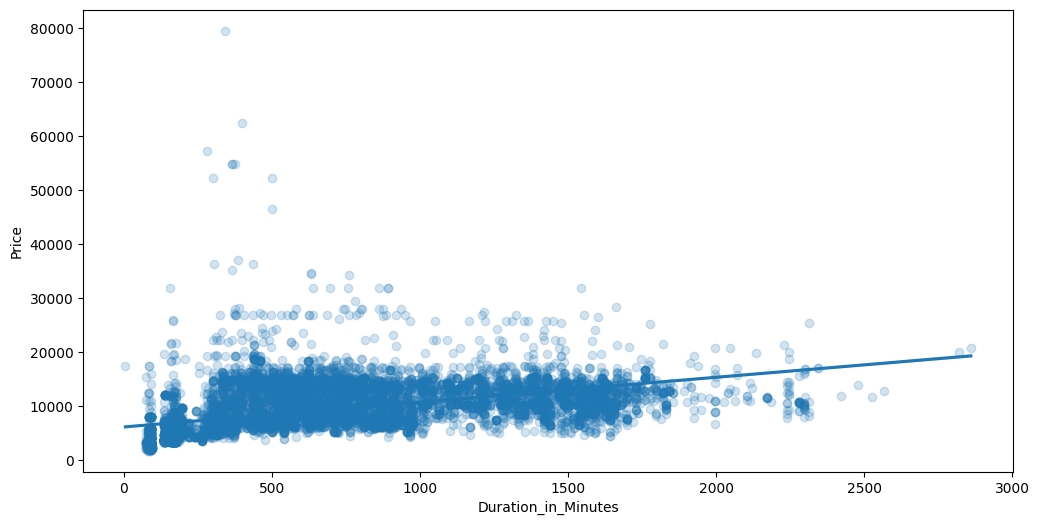

In [429]:
sns.regplot(x='Duration_in_Minutes', y='Price', data=train_df, scatter_kws={'alpha': 0.2})

### Observation
- Many flight prices range between 5k to 15k, regardless of the flight duration
- Flight prices gradually increases as duration increases (very minute upward slope)
- Has many outlier between 30k to 80k
- Also shows outlier, flight duration > 2000 minutes.

In [430]:
train_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,Route3,Route4,Route5,Route6,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,BLR,DEL,None,None,None,None,170


### Converting total stops into a numeric value

In [431]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

#### Mapping manually

In [432]:
train_df['Total_Stops'] = train_df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,Route3,Route4,Route5,Route6,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,BLR,DEL,None,None,None,None,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None,None,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None,None,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,CCU,NAG,BLR,None,None,None,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,BLR,NAG,DEL,None,None,None,285


In [433]:
train_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [434]:
train_df[train_df['Total_Stops']==4]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,Route3,Route4,Route5,Route6,Duration_in_Minutes
9182,Air India,Banglore,New Delhi,4,Change airports,17686,1,3,2019,5,50,11,20,BLR,CCU,BBI,HYD,VGA,DEL,1770


In [435]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Total_Stops          10682 non-null  int64 
 4   Additional_Info      10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Journey_Date         10682 non-null  int64 
 7   Journey_Month        10682 non-null  int64 
 8   Journey_Year         10682 non-null  int64 
 9   Dep_Hour             10682 non-null  int64 
 10  Dep_Minutes          10682 non-null  int64 
 11  Arrival_Hour         10682 non-null  int64 
 12  Arrival_Minutes      10682 non-null  int64 
 13  Route1               10682 non-null  object
 14  Route2               10682 non-null  object
 15  Route3               7191 non-null   object
 16  Route4   

In [436]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

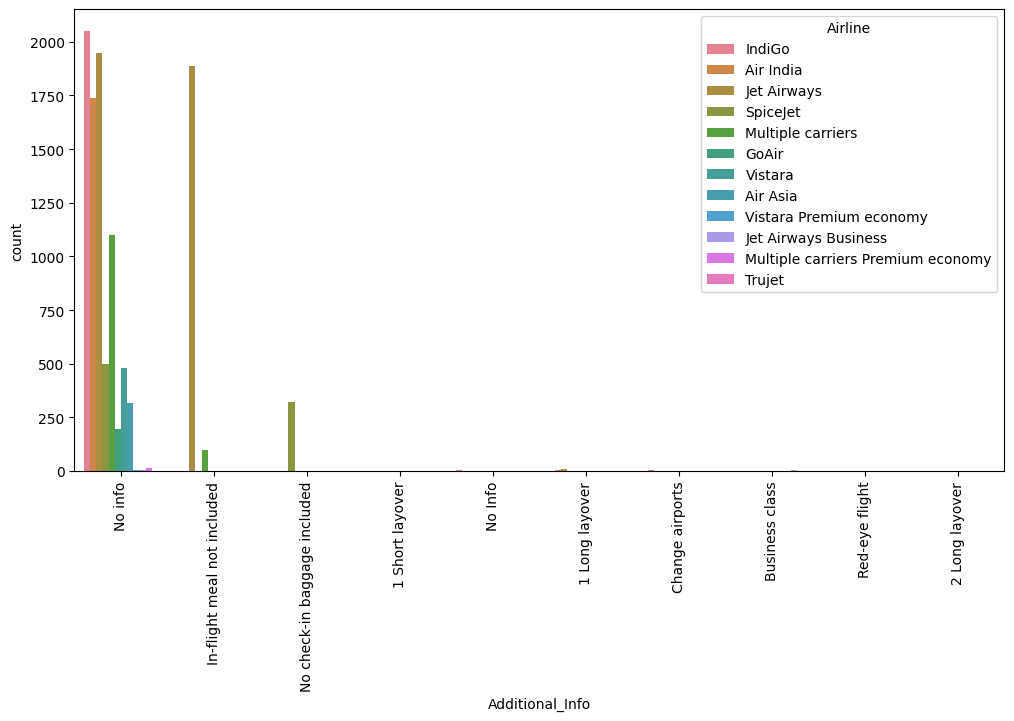

In [437]:
sns.countplot(x='Additional_Info', hue='Airline', data=train_df)
plt.xticks(rotation=90)

In [438]:
cross = pd.crosstab(train_df['Airline'], train_df['Additional_Info'])
cross

Additional_Info,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
Airline,,,,,,,,,,
Air Asia,0,0,0,0,0,0,0,0,318,1
Air India,6,1,1,0,7,0,0,0,1736,0
GoAir,0,0,0,0,0,0,0,0,194,0
IndiGo,0,0,0,0,0,0,3,0,2050,0
Jet Airways,12,0,0,1,0,1886,0,0,1950,0
Jet Airways Business,0,0,0,3,0,0,0,0,3,0
Multiple carriers,0,0,0,0,0,96,0,0,1100,0
Multiple carriers Premium economy,0,0,0,0,0,0,0,0,13,0
SpiceJet,1,0,0,0,0,0,0,320,497,0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '1 Long layover'),
  Text(1.5, 0, '1 Short layover'),
  Text(2.5, 0, '2 Long layover'),
  Text(3.5, 0, 'Business class'),
  Text(4.5, 0, 'Change airports'),
  Text(5.5, 0, 'In-flight meal not included'),
  Text(6.5, 0, 'No Info'),
  Text(7.5, 0, 'No check-in baggage included'),
  Text(8.5, 0, 'No info'),
  Text(9.5, 0, 'Red-eye flight')])

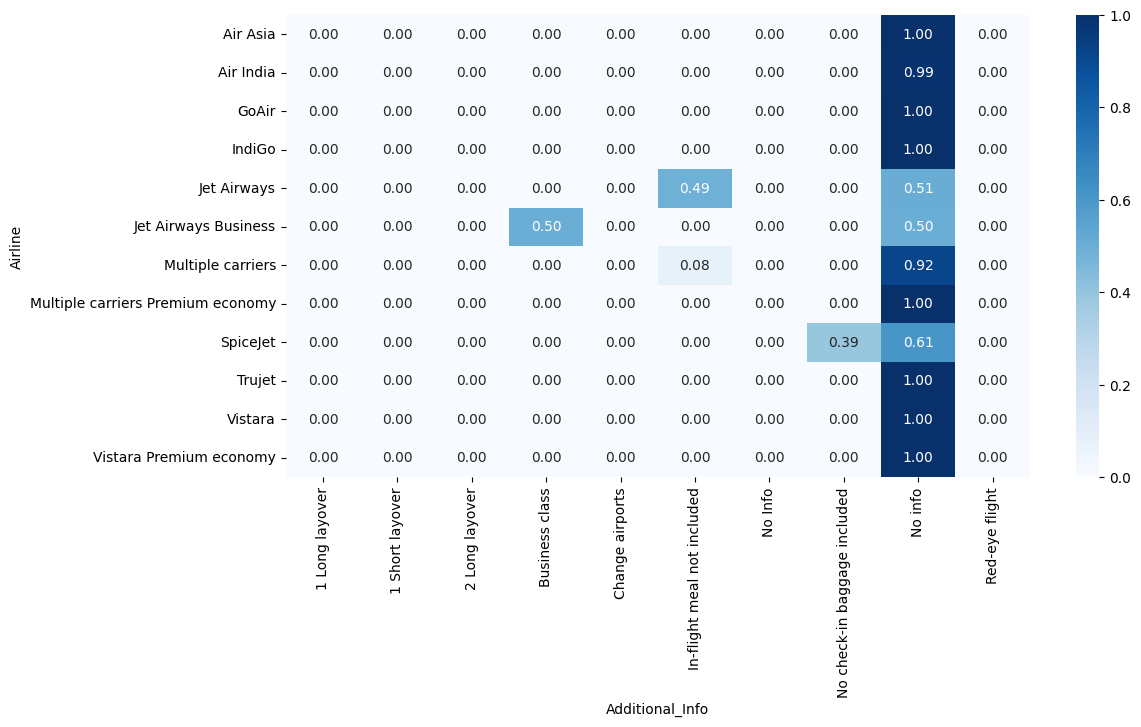

In [439]:
cross_pct = cross.div(cross.sum(axis=1), axis=0)

sns.heatmap(cross_pct, cmap='Blues', annot=True, fmt='.2f')
plt.xticks(rotation=90)

In [440]:
train_df['Airline'].value_counts()['Jet Airways Business']

np.int64(6)

### Observation for Additional Info
- 50% of Jet Airways Business Flights offers Business Class
- almost 50% of Jet Airways flight does not include in-flight meals
- 39% of spicejet flights have no check-in baggage feature

In [441]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_Date', 'Journey_Month', 'Journey_Year', 'Dep_Hour',
       'Dep_Minutes', 'Arrival_Hour', 'Arrival_Minutes', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5', 'Route6', 'Duration_in_Minutes'],
      dtype='object')

### Converting categorical columns into numeric using LabelEncoder

In [442]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Total_Stops          10682 non-null  int64 
 4   Additional_Info      10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Journey_Date         10682 non-null  int64 
 7   Journey_Month        10682 non-null  int64 
 8   Journey_Year         10682 non-null  int64 
 9   Dep_Hour             10682 non-null  int64 
 10  Dep_Minutes          10682 non-null  int64 
 11  Arrival_Hour         10682 non-null  int64 
 12  Arrival_Minutes      10682 non-null  int64 
 13  Route1               10682 non-null  object
 14  Route2               10682 non-null  object
 15  Route3               7191 non-null   object
 16  Route4   

### 📌 If you're using RandomForest, XGBoost, CatBoost, LightGBM
👉 Feel free to label encode everything — trees don’t care about number order

### 📌 If you're using Linear Regression, Logistic Regression, Neural Networks

👉 One-Hot is mandatory for all nominal categorical features.

#### OneHotEncode our airlines

In [443]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(train_df[['Airline']])
ohetransform.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Merge them with our original dataset and drop Airline feature

In [444]:
train_df = pd.concat([train_df, ohetransform], axis=1).drop(columns=['Airline'])
train_df.head()

,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [445]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(train_df[['Source']])
ohetransform.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [446]:
train_df = pd.concat([train_df, ohetransform], axis=1).drop(columns=['Source'])
train_df.head()

,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,0,No info,3897,24,3,2019,22,20,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Banglore,2,No info,7662,1,5,2019,5,50,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Cochin,2,No info,13882,9,6,2019,9,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Banglore,1,No info,6218,12,5,2019,18,5,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,New Delhi,1,No info,13302,1,3,2019,16,50,21,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [447]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(train_df[['Destination']])
ohetransform.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [448]:
train_df = pd.concat([train_df, ohetransform], axis=1).drop(columns=['Destination'])
train_df.head()

,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,2019,22,20,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,No info,7662,1,5,2019,5,50,13,15,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,No info,13882,9,6,2019,9,25,4,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,No info,6218,12,5,2019,18,5,23,30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,No info,13302,1,3,2019,16,50,21,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [449]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(train_df[['Additional_Info']])
ohetransform.head()

,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [450]:
train_df = pd.concat([train_df, ohetransform], axis=1).drop(columns=['Additional_Info'])
train_df.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,22,20,1,10,BLR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,7662,1,5,2019,5,50,13,15,CCU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,13882,9,6,2019,9,25,4,25,DEL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6218,12,5,2019,18,5,23,30,CCU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,13302,1,3,2019,16,50,21,35,BLR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### LabelEncoding routes as there are many of them, if one hot encoded dimensions of column may increase

In [451]:
train_df.shape

(10682, 49)

In [452]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10682 non-null  int64  
 1   Price                                         10682 non-null  int64  
 2   Journey_Date                                  10682 non-null  int64  
 3   Journey_Month                                 10682 non-null  int64  
 4   Journey_Year                                  10682 non-null  int64  
 5   Dep_Hour                                      10682 non-null  int64  
 6   Dep_Minutes                                   10682 non-null  int64  
 7   Arrival_Hour                                  10682 non-null  int64  
 8   Arrival_Minutes                               10682 non-null  int64  
 9   Route1                                        10682 non-null  obje

In [453]:
from sklearn.preprocessing import LabelEncoder

train_df['Route1'].dtype

dtype('O')

In [468]:
all_routes = ['Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Route6']
pd.concat([train_df[route] for route in all_routes]).shape

(64092,)

In [469]:
train_df.shape

(10682, 49)

In [470]:
all_routes = ['Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Route6']

le = LabelEncoder()
le.fit(pd.concat([train_df[route] for route in all_routes]).fillna('None'))

for route in all_routes:
    train_df[route] = le.transform(train_df[route].fillna('None'))

In [472]:
train_df.tail()

,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
10678,0,4107,9,4,2019,19,55,22,25,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,0,4145,27,4,2019,20,45,23,20,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0,7229,27,4,2019,8,20,11,20,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,0,12648,1,3,2019,11,30,14,10,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10682,2,11753,9,5,2019,10,55,19,15,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [473]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10682 non-null  int64  
 1   Price                                         10682 non-null  int64  
 2   Journey_Date                                  10682 non-null  int64  
 3   Journey_Month                                 10682 non-null  int64  
 4   Journey_Year                                  10682 non-null  int64  
 5   Dep_Hour                                      10682 non-null  int64  
 6   Dep_Minutes                                   10682 non-null  int64  
 7   Arrival_Hour                                  10682 non-null  int64  
 8   Arrival_Minutes                               10682 non-null  int64  
 9   Route1                                        10682 non-null  int6

In [474]:
X_train = train_df.drop(['Price'], axis=1)
y_train = train_df['Price']

X_train.head()

,Total_Stops,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route1,Route2,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,2019,22,20,1,10,47,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,5,2019,5,50,13,15,49,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,9,6,2019,9,25,4,25,50,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,12,5,2019,18,5,23,30,49,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,3,2019,16,50,21,35,47,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [475]:
y_train.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [476]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

X_train_scaled

array([[-1.22066609,  1.23728754, -1.46740227, ..., -0.17573295,
         0.52934048, -0.00967596],
       [ 1.74143186, -1.47530729,  0.25028893, ..., -0.17573295,
         0.52934048, -0.00967596],
       [ 1.74143186, -0.53179604,  1.10913453, ..., -0.17573295,
         0.52934048, -0.00967596],
       ...,
       [-1.22066609,  1.59110426, -0.60855667, ..., -0.17573295,
         0.52934048, -0.00967596],
       [-1.22066609, -1.47530729, -1.46740227, ..., -0.17573295,
         0.52934048, -0.00967596],
       [ 1.74143186, -0.53179604,  0.25028893, ..., -0.17573295,
         0.52934048, -0.00967596]], shape=(10682, 48))